In [152]:
import matplotlib.pyplot as plt 
import numpy as np 
import math

In [97]:
# https://github.com/steven-mi/convolutional-numpy-network/blob/4fecaabc05ac6e807ba4172ffe0fbdd4cda82310/cnn/activation_func.py

In [165]:
def Sigmoid(x):
    return 1. / (1 + np.exp(-x))

def dSigmoid(x):
    return x * (1. - x)

def tanh(x):
    return np.sinh(x)/np.cosh(x)

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

def Leaky_ReLU(x, leaky_slope = 0.1):
    return np.maximum(leaky_slope*x, x)

# Exponential-Linear-Unit
def ELU(x, _alpha=0.1):
    # z if z > 0  else alpha * (e^z - 1)
    return np.where(x > 0, x, _alpha * (np.exp(x) - 1))

# Scaled Exponential Linear Units
def SELU(x, _lambda=1.0507, _alpha = 1.67326):
    return _lambda * ELU(x, _alpha)

# The Parametric Rectified Linear Unit (PReLU)
def ParametricReLU(x, alpha=0.1):
    """Parametric rectified linear unit function...
    Args:
        z (np.array)
    Returns:
        f(z) = z if z > 0 else alpha * z (np.array)
    """
#     pos = ReLU(x)
#     neg = alpha * (x - abs(x)) * 0.5
#     return pos + neg
    return x * (x > 0) + alpha * x * (x <= 0)

def Swish(x, beta = 1.0):
    return x * Sigmoid(beta * x)

def Mish(x):
    return x * np.tanh(softplus(x))

def GELU(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
    
def softplus(x):
    return np.log(1 + np.exp(x))

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def Dice(_x, axis=-1, epsilon=0.000000001, name='dice', training=True):
    alphas = tf.get_variable('alpha_'+name, _x.get_shape()[-1],
            initializer=tf.constant_initializer(0.0),
            dtype=tf.float32)
    inputs_normed = tf.layers.batch_normalization(
            inputs=_x, 
            axis=axis, 
            epsilon=epsilon, 
            center=False, 
            scale=False, 
            training=training)
    x_p = tf.sigmoid(inputs_normed)
    return alphas * (1.0 - x_p) * _x + x_p * _x

In [149]:
x = np.linspace(-10, 10, 100) 

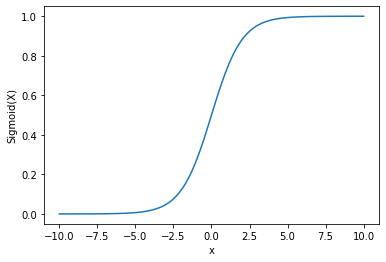

In [155]:
plt.plot(x, Sigmoid(x)) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

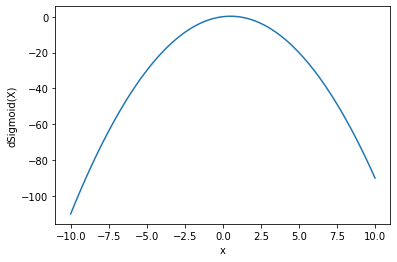

In [154]:
plt.plot(x, dSigmoid(x)) 
plt.xlabel("x") 
plt.ylabel("dSigmoid(X)") 
  
plt.show()

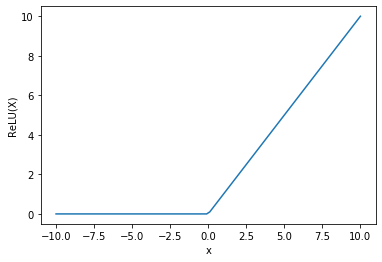

In [156]:
plt.plot(x, ReLU(x)) 
plt.xlabel("x") 
plt.ylabel("ReLU(X)") 
  
plt.show()

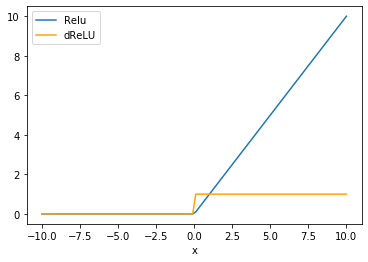

In [157]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,dReLU(x),color='orange', label='dReLU')
plt.xlabel("x") 
plt.legend()

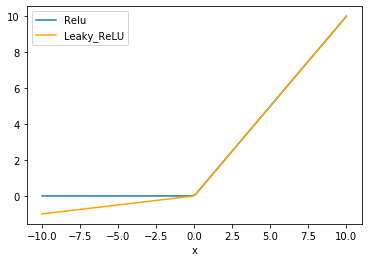

In [158]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,Leaky_ReLU(x),color='orange', label='Leaky_ReLU')
plt.xlabel("x") 
plt.legend()

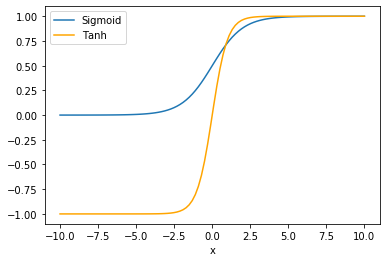

In [159]:
plt.plot(x,Sigmoid(x), label='Sigmoid')
plt.plot(x,tanh(x),color='orange', label='Tanh')
plt.xlabel("x") 
plt.legend()

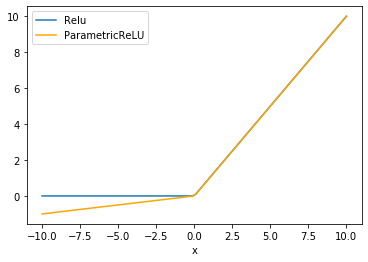

In [160]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,ParametricReLU(x, 0.1),color='orange', label='ParametricReLU')
plt.xlabel("x") 
plt.legend()

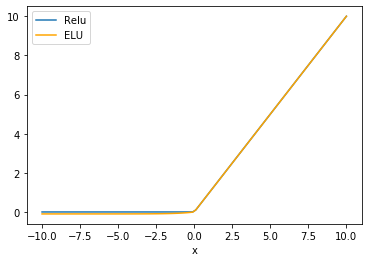

In [139]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,ELU(x),color='orange', label='ELU')
plt.xlabel("x") 
plt.legend()

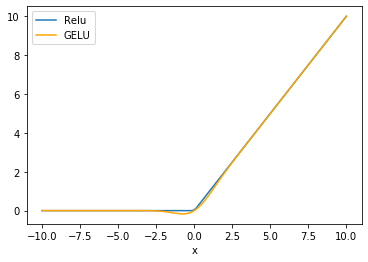

In [166]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,GELU(x),color='orange', label='GELU')
plt.xlabel("x") 
plt.legend()

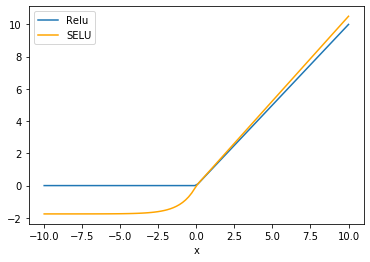

In [161]:
plt.plot(x,ReLU(x), label='Relu')
plt.plot(x,SELU(x),color='orange', label='SELU')
plt.xlabel("x") 
plt.legend()

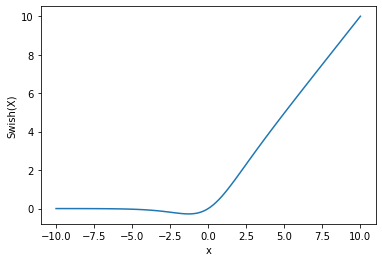

In [141]:
plt.plot(x, Swish(x)) 
plt.xlabel("x") 
plt.ylabel("Swish(X)") 
  
plt.show()

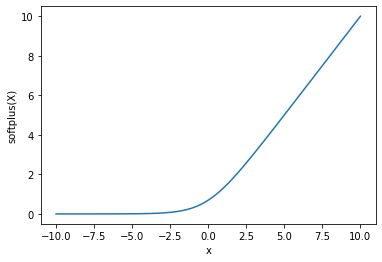

In [142]:
plt.plot(x, softplus(x)) 
plt.xlabel("x") 
plt.ylabel("softplus(X)") 
  
plt.show()

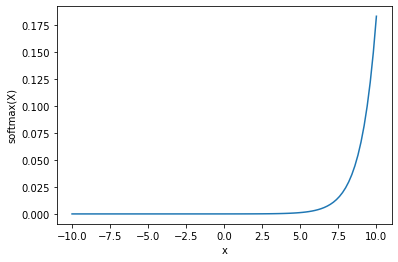

In [143]:
plt.plot(x, softmax(x)) 
plt.xlabel("x") 
plt.ylabel("softmax(X)") 
  
plt.show()

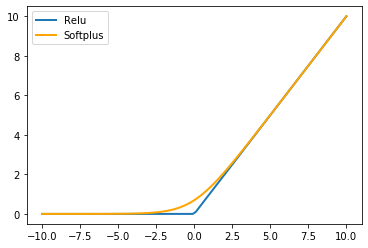

In [144]:
plt.plot(x,ReLU(x),linewidth=2,label='Relu')
plt.plot(x,softplus(x),color='orange',linewidth=2,label='Softplus')
plt.legend()

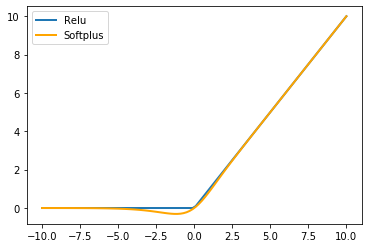

In [145]:
plt.plot(x,ReLU(x),linewidth=2,label='Relu')
plt.plot(x,Mish(x),color='orange',linewidth=2,label='Softplus')
plt.legend()

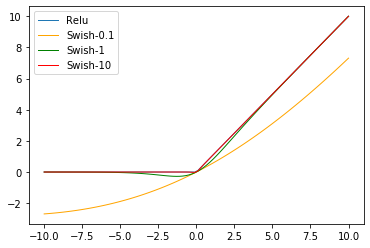

In [146]:
plt.plot(x,ReLU(x),linewidth=1,label='Relu')
plt.plot(x,Swish(x, 0.1),color='orange',linewidth=1,label='Swish-0.1')
plt.plot(x,Swish(x, 1),color='g',linewidth=1,label='Swish-1')
plt.plot(x,Swish(x, 10),color='red',linewidth=1,label='Swish-10')
plt.legend()